## WSDM - KKBox's Music Recommendation Challenge

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "data/"]).decode("utf8"))

/Users/srimi/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


members.csv
members.csv.7z
sample_submission.csv
sample_submission.csv.7z
song_extra_info.csv
song_extra_info.csv.7z
songs.csv
songs.csv.7z
test.csv
test.csv.7z
train.csv
train.csv.7z



### Exploratory Analysis  - train set


In [2]:
df_train = pd.read_csv("data/train.csv")
# df_songs = pd.read_csv("../input/songs.csv")
# df_songs_extra = pd.read_csv("../input/song_extra_info.csv")
# df_members = pd.read_csv("../input/members.csv",parse_dates=["registration_init_time","expiration_date"])
# df_test = pd.read_csv("../input/test.csv")

In [3]:
df_train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x103fd4510>]], dtype=object)

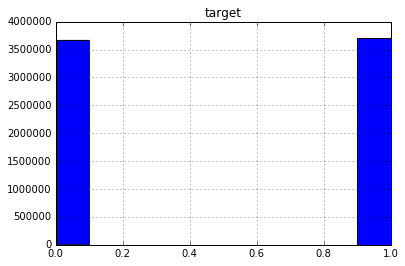

In [4]:
df_train.hist()

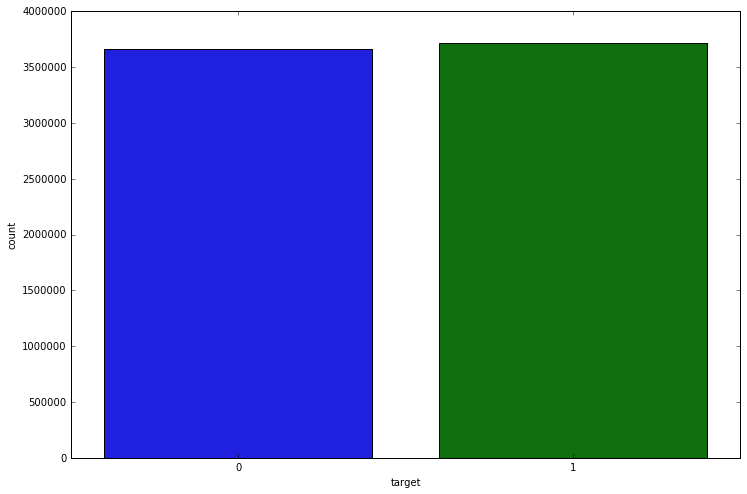

In [5]:
plt.figure(figsize=(12,8))
sns.countplot(df_train['target'])

In [6]:
print "Number of unique songs is ",df_train['song_id'].nunique()

Number of unique songs is  359966


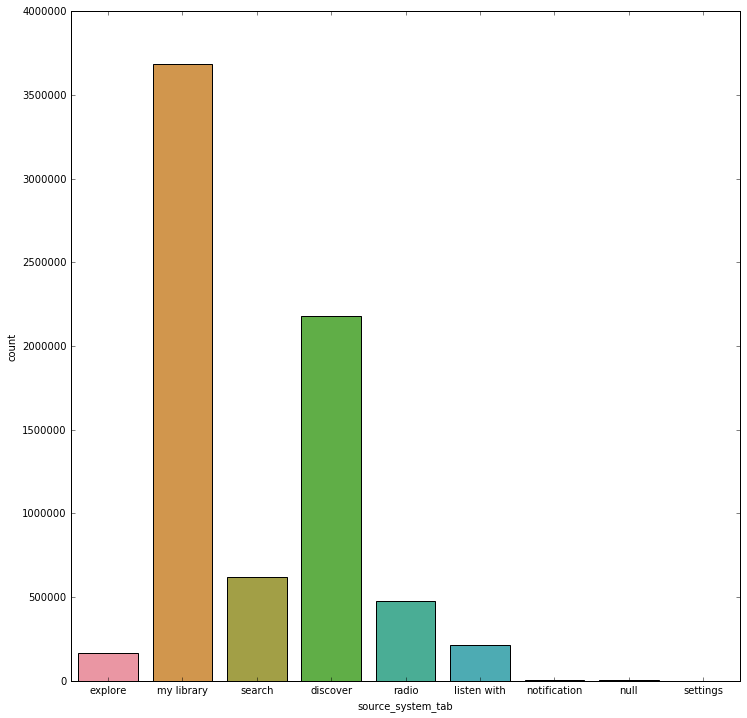

In [7]:
plt.figure(figsize=(12,12))
sns.countplot(df_train['source_system_tab'])

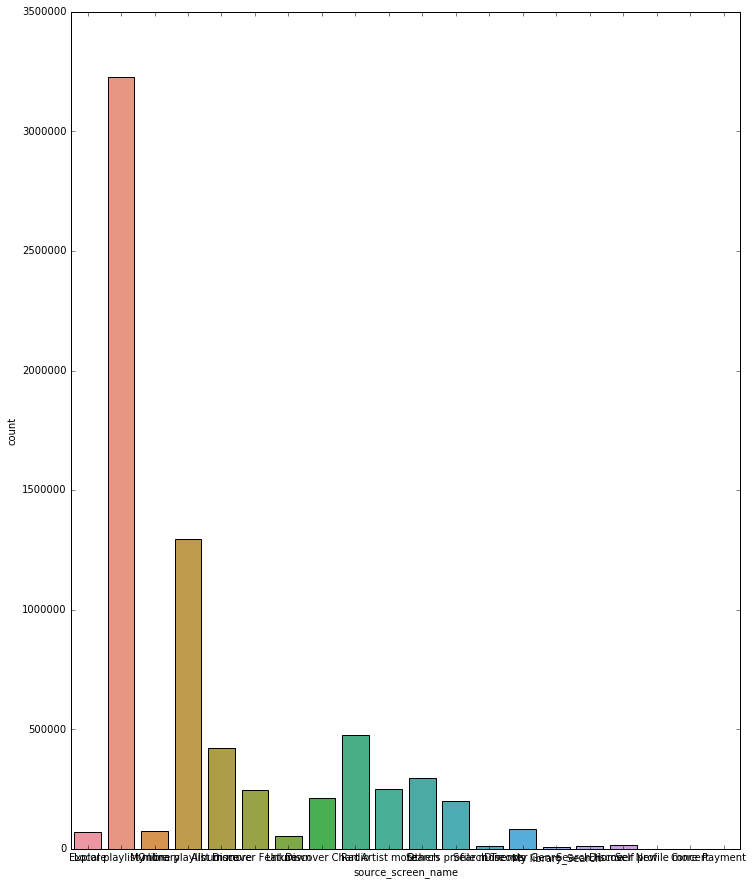

In [8]:
plt.figure(figsize=(12,15))
sns.countplot(df_train['source_screen_name'])

In [11]:
df_train.source_screen_name.unique()

array(['Explore', 'Local playlist more', nan, 'My library',
       'Online playlist more', 'Album more', 'Discover Feature', 'Unknown',
       'Discover Chart', 'Radio', 'Artist more', 'Search',
       'Others profile more', 'Search Trends', 'Discover Genre',
       'My library_Search', 'Search Home', 'Discover New',
       'Self profile more', 'Concert', 'Payment'], dtype=object)

In [13]:
df_train.source_type.unique()

array(['online-playlist', 'local-playlist', 'local-library',
       'top-hits-for-artist', 'album', nan, 'song-based-playlist', 'radio',
       'song', 'listen-with', 'artist', 'topic-article-playlist',
       'my-daily-playlist'], dtype=object)

### Exploratory Analysis - songs 

In [9]:
df_songs = pd.read_csv("data/songs.csv")
df_songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [23]:
df_songs[ df_songs.genre_ids == "1259|2107" ]
df_songs['genre_id_list'] = df_songs.genre_ids.apply(lambda x: str(x).split('|'))
df_songs.head()

2270295    Valeria Valencia| Paulo Pereyra
Name: composer, dtype: object

In [26]:
df_songs['composer_list'] = df_songs.composer.apply(lambda x: str(x).split('|'))
df_songs['lyricist_list'] = df_songs.lyricist.apply(lambda x: str(x).split('|'))
df_songs[ df_songs.genre_ids == "1259|2107" ]

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language,genre_id_list,composer_list,lyricist_list
2270295,zk9Egyf0ghw8qLV/l/vXNTfPBfPCopCT7ow803mbZD0=,203232,1259|2107,Mi Puga Mi Pishgo,Valeria Valencia| Paulo Pereyra,Valeria Valencia| Paulo Pereyra,52.0,"[1259, 2107]","[Valeria Valencia, Paulo Pereyra]","[Valeria Valencia, Paulo Pereyra]"


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117c35310>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x19fbbc3d0>]], dtype=object)

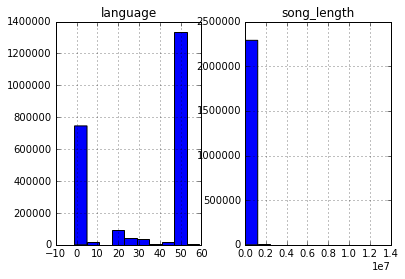

In [27]:
df_songs.hist()

In [67]:
df_members = pd.read_csv("data/members.csv")
df_members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
msno                      34403 non-null object
city                      34403 non-null int64
bd                        34403 non-null int64
gender                    14501 non-null object
registered_via            34403 non-null int64
registration_init_time    34403 non-null int64
expiration_date           34403 non-null int64
dtypes: int64(5), object(2)
memory usage: 1.8+ MB
No of unique members 34403


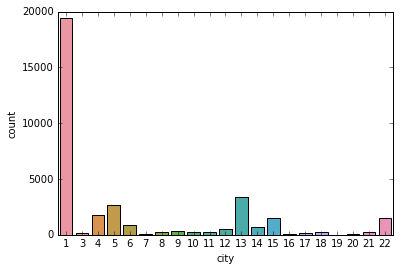

In [68]:
sns.countplot(df_members['city'])
df_members.info()
print "No of unique members", df_members['msno'].nunique()

In [69]:
df_members["registration_init_time"] = pd.to_datetime(df_members["registration_init_time"],format='%Y%m%d', errors='ignore')
df_members["expiration_date"] = pd.to_datetime(df_members["expiration_date"],format='%Y%m%d', errors='ignore')
df_members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,2011-08-20,2017-09-20
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,2015-06-28,2017-06-22
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,2016-04-11,2017-07-12
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,2015-09-06,2015-09-07
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,2017-01-26,2017-06-13


In [76]:
from datetime import datetime, date, time, timedelta

df_members['days_td'] = df_members['expiration_date'].sub(df_members['registration_init_time'],axis=0)
df_members.head()
df_members_regi = df_members[['registered_via','days_td']]
df_members_regi.info()
df_members_regi['days'] = df_members_regi['days_td'].apply( lambda x: x.days )
del df_members_regi['days_td']
df_members_regi.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 2 columns):
registered_via    34403 non-null int64
days_td           34403 non-null timedelta64[ns]
dtypes: int64(1), timedelta64[ns](1)
memory usage: 537.6 KB


/Users/srimi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,registered_via,days
0,7,2223
1,7,725
2,4,457
3,9,1
4,4,138


In [86]:
#https://chrisalbon.com/python/pandas_apply_operations_to_groups.html
df_members_regi['days'].groupby(df_members_regi['registered_via']).mean()

registered_via
3     1067.009633
4      119.352791
7     1210.519347
9     2266.427098
13     232.328571
16       0.000000
Name: days, dtype: float64

In [11]:
df_test = pd.read_csv("data/test.csv")
df_test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [12]:
df_song_extra_info = pd.read_csv("data/song_extra_info.csv")
df_song_extra_info.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [21]:
pd.to_datetime('13000101', format='%Y%m%d', errors='ignore')

datetime.datetime(1300, 1, 1, 0, 0)